In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

path = '../../../project_data/fer2013/icml_face_data.csv'
df = pd.read_csv(path)

# creating a dataframe that only contains training data
train = df[df[' Usage']=='Training'].copy()
# dropping the usage column
train.drop([' Usage'], axis = 1, inplace = True)


# creating the test dataframe, dropping the usage column and reseting the index
test = df[df[' Usage']=='PrivateTest'].copy()
test.drop([' Usage'], axis = 1, inplace = True)
test.reset_index(inplace = True, drop = True)

# creating the validation dataframe and dropping the usage column and reseting the index
validation = df[df[' Usage']=='PublicTest'].copy()
validation.drop([' Usage'], axis = 1, inplace = True)
validation.reset_index(inplace=True, drop = True)


def get_pixels_and_scale(data):
    '''
    Function for extracting pixel values from the pixel column and scaling them between 0 and 1
    
    get values from the column|
    split on the whitespace
    convert to float16 datatype
    save as as numpy array
    scale the values between 0 and 1
    '''
    
    img_array = np.array(data.split(' '), dtype = 'float16')
    img_array = img_array / 255.0
    
    return img_array

def reshape_images(data):
    '''
    reshape pixels column into desired format
    return a numpy array
    '''

    reshaped_array = np.reshape(data[' pixels'].to_list(),(data.shape[0],48,48,1))
    
    return reshaped_array

def plot_random_images(dataset): 
    if np.array_equal(dataset, train_images):
        labels = train_labels
    else:
        labels = test_labels

    # Checking 25 random images from the train set across all classes
    plt.figure(figsize=(12,12))
    for ind, img_num in enumerate(np.random.randint(1,len(dataset),size=25)):
        plt.subplot(5,5,ind+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(dataset[img_num], cmap='gray')
        plt.xlabel(emotions[labels[img_num]])
    plt.show()
    
def plot_model_accuracy(fitted_model):
    '''
    Function visualizing comparison of 
    training and validaton loss and accuracy
    
    '''
    
    fig , ax = plt.subplots(1,2)
    train_acc = fitted_model.history['accuracy']
    train_loss = fitted_model.history['loss']
    fig.set_size_inches(15,4)

    ax[0].plot(fitted_model.history['accuracy'])
    ax[0].plot(fitted_model.history['val_accuracy'])
    ax[0].set_title('Training vs Validation Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Training', 'Validation'], loc='lower right')

    ax[1].plot(fitted_model.history['loss'])
    ax[1].plot(fitted_model.history['val_loss'])
    ax[1].set_title('Training vs Validation Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Training', 'Validation'], loc='lower left')

    plt.show()
    

# extracting pixel values from the pixel column and scaling them between 0 and 1    
train[' pixels'] = train[' pixels'].apply(get_pixels_and_scale)   
test[' pixels'] = test[' pixels'].apply(get_pixels_and_scale)
validation[' pixels'] = validation[' pixels'].apply(get_pixels_and_scale)

# reshaping pixels column into a desired format and getting a numpy array
train_images = reshape_images(train)
test_images = reshape_images(test)
validation_images = reshape_images(validation)


# getting the labels
train_labels = train['emotion']
test_labels = test['emotion']
validation_labels = validation['emotion']

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(validation_images.shape, validation_labels.shape)

(28709, 48, 48, 1) (28709,)
(3589, 48, 48, 1) (3589,)
(3589, 48, 48, 1) (3589,)


In [6]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Flatten

print(tf.__version__)

2.8.0


In [7]:
# one-hot encoding
y_train = tf.keras.utils.to_categorical(train_labels, 7)
y_test = tf.keras.utils.to_categorical(test_labels, 7)
y_validation = tf.keras.utils.to_categorical(validation_labels, 7)

In [4]:
# # https://stackoverflow.com/questions/58352326/running-the-tensorflow-2-0-code-gives-valueerror-tf-function-decorated-functio
# tf.config.run_functions_eagerly(True)

Metal device set to: Apple M1


2022-05-10 08:54:45.067866: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 08:54:45.068079: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2022-05-10 08:54:45.569878: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-10 08:54:45.859546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


898/898 [==============================] - ETA: 0s - loss: 1.6289 - accuracy: 0.3587

2022-05-10 08:55:32.727548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


898/898 [==============================] - 48s 53ms/step - loss: 1.6289 - accuracy: 0.3587 - val_loss: 1.5059 - val_accuracy: 0.4558
Epoch 2/10
898/898 [==============================] - 46s 52ms/step - loss: 1.3842 - accuracy: 0.4742 - val_loss: 1.3888 - val_accuracy: 0.5026
Epoch 3/10
898/898 [==============================] - 46s 52ms/step - loss: 1.2660 - accuracy: 0.5210 - val_loss: 1.3086 - val_accuracy: 0.5052
Epoch 4/10
898/898 [==============================] - 46s 52ms/step - loss: 1.1943 - accuracy: 0.5523 - val_loss: 1.3004 - val_accuracy: 0.5383
Epoch 5/10
898/898 [==============================] - 46s 52ms/step - loss: 1.1310 - accuracy: 0.5768 - val_loss: 1.2369 - val_accuracy: 0.5383
Epoch 6/10
898/898 [==============================] - 46s 52ms/step - loss: 1.0819 - accuracy: 0.5947 - val_loss: 1.2519 - val_accuracy: 0.5358
Epoch 7/10
898/898 [==============================] - 47s 52ms/step - loss: 1.0332 - accuracy: 0.6166 - val_loss: 1.2182 - val_accuracy: 0.5464
Epo

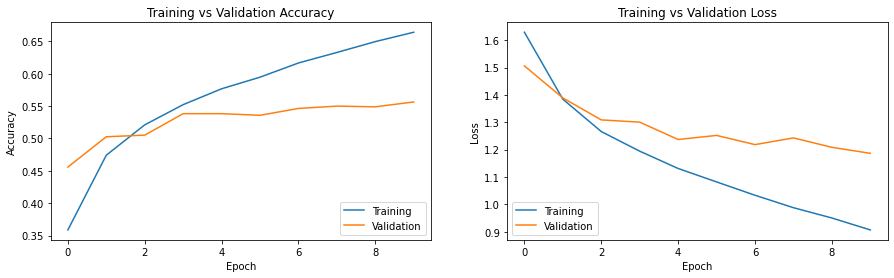

In [8]:
# creating a sequential model
mdl5 = Sequential()
mdl5.add(
    Conv2D(
        128, kernel_size = 3, 
        activation='relu', 
        input_shape = (28709,48,48,1),
        padding='same')#strides = 2, dilation_rate=2
)
mdl5.add(Dropout(0.25))
mdl5.add(MaxPool2D(2))

mdl5.add(
    Conv2D(
        128, kernel_size = 3, 
        activation='relu', 
        padding='same')#strides = 2, dilation_rate=2
)
mdl5.add(Dropout(0.25))
mdl5.add(MaxPool2D(2))

mdl5.add(
    Conv2D(
        256, kernel_size = 3, 
        activation='relu', 
        padding='same')#strides = 2, dilation_rate=2
)
mdl5.add(Dropout(0.25))
mdl5.add(MaxPool2D(2))


mdl5.add(Flatten())
mdl5.add(Dense(7, activation='softmax'))

# compile the model
mdl5.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

mdl5_performance = mdl5.fit(
    x=train_images,
    y=y_train, 
    validation_data = (validation_images, y_validation),
    epochs=10)

#compare how the model performs on the test dataset:
mdl5_test_loss, mdl5_test_acc = mdl5.evaluate(test_images, y_test, verbose=2)
print(f'\nTest accuracy: {mdl5_test_acc * 100.0:.2f}%')

# visualize accuracy
plot_model_accuracy(mdl5_performance)

## Interpreting Layers

In [9]:
# definining a function to convolve kernels with images
def convolution(image, kernel):
    '''
    convolve the image with the kernel using, and create a filtered image 
    that is the result of the convolution.
    '''
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-2):
        for jj in range(image.shape[1]-2):
            result[ii, jj] = np.sum(image[ii:ii+3, jj:jj+3] * kernel)

    return result

In [10]:
mdl5.layers

In [11]:
conv1 = mdl5.layers[0]
weights1 = conv1.get_weights()
kernels1 = weights1[0]
kernels1.shape

(3, 3, 1, 128)

In [12]:
kernel1_1 = kernels1[:,:,0,0]
kernel1_1.shape

(3, 3)

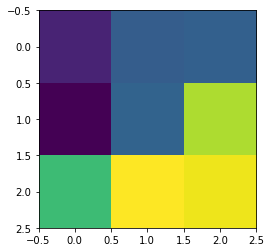

In [13]:
plt.imshow(kernel1_1)

To understand what this kernel does, it might sometimes be even more useful to convolve one of the images from our test set with this kernel and see what aspects of the image are emphasized by this kernel. Here, we pick the fourth image from the test_set, an image of a shoe.

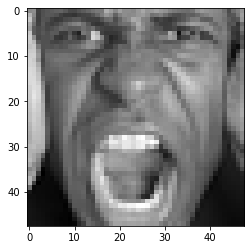

In [14]:
# selecting a test image
test_img  = test_images[5,:,:,0]
plt.imshow(test_img, cmap='gray')
plt.show()

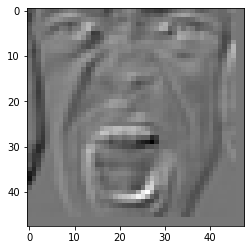

In [15]:
filt_image = convolution(test_img,kernel1_1)
plt.imshow(filt_image, cmap='gray')
plt.show()

In [83]:
mdl5.layers

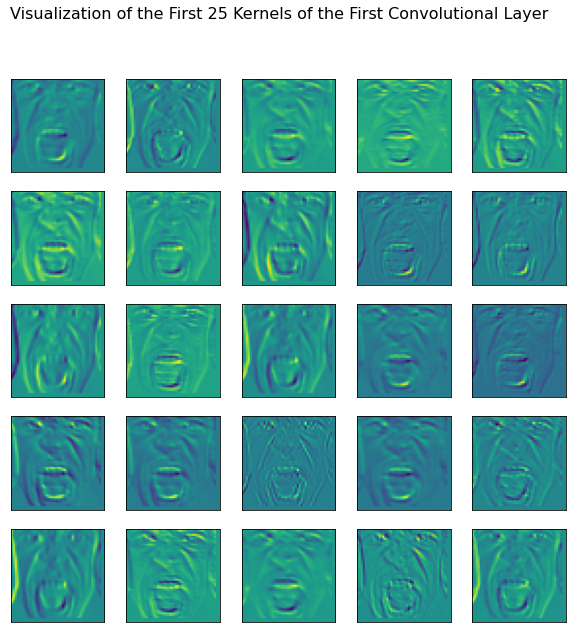

In [84]:
weights = mdl5.layers[0].get_weights()
kernels = weights[0]

fig = plt.figure(figsize=(10,10))
fig.suptitle('Visualization of the First 25 Kernels of the First Convolutional Layer', fontsize=16)
for i in range(25):
    kernel = kernels[:,:,0,i]

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(convolution(test_img,kernel))
plt.show()    

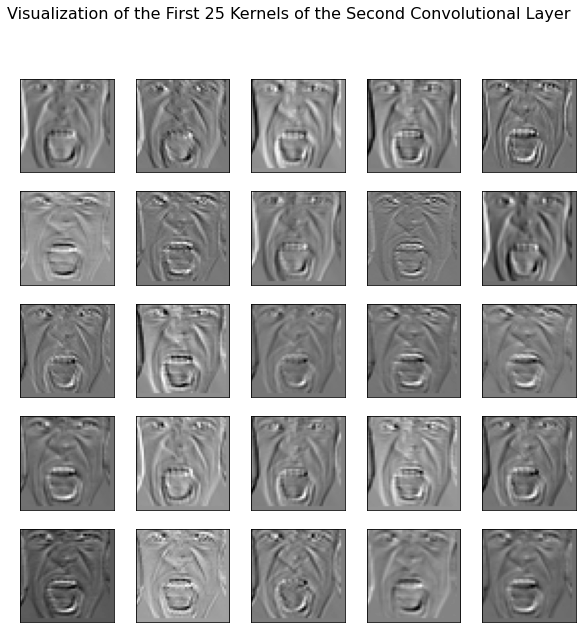

In [82]:
weights = mdl5.layers[3].get_weights()
kernels = weights[0]

fig = plt.figure(figsize=(10,10))
fig.suptitle('Visualization of the First 25 Kernels of the Second Convolutional Layer', fontsize=16)
for i in range(25):
    kernel = kernels[:,:,0,i]

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(convolution(test_img,kernel), cmap='gray')
plt.show()    

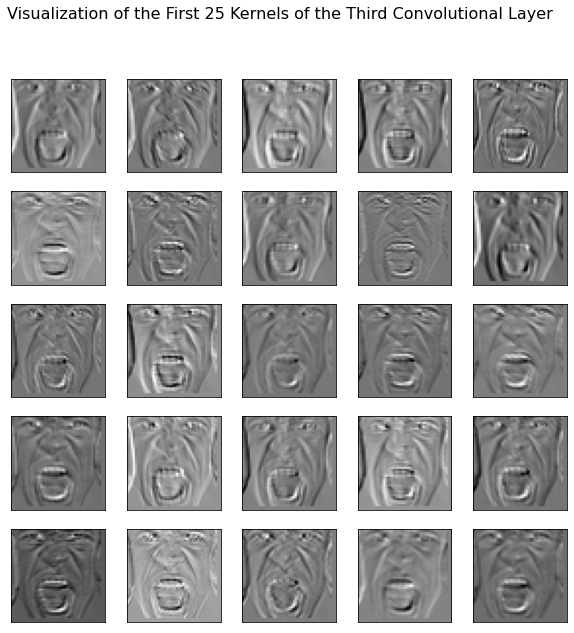

In [80]:
weights = mdl5.layers[3].get_weights()
kernels = weights[0]

fig = plt.figure(figsize=(10,10))
fig.suptitle('Visualization of the First 25 Kernels of the Third Convolutional Layer', fontsize=16)
for i in range(25):
    kernel = kernels[:,:,0,i]

    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(convolution(test_img,kernel), cmap='gray')
plt.show()    

## Fine-tuning the model

Epoch 1/10


2022-05-10 10:04:57.874237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


898/898 [==============================] - ETA: 0s - loss: 1.7549 - accuracy: 0.2799

2022-05-10 10:08:29.209587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


898/898 [==============================] - 219s 243ms/step - loss: 1.7549 - accuracy: 0.2799 - val_loss: 1.6181 - val_accuracy: 0.3820
Epoch 2/10
898/898 [==============================] - 224s 249ms/step - loss: 1.5048 - accuracy: 0.4196 - val_loss: 1.4418 - val_accuracy: 0.4556
Epoch 3/10
898/898 [==============================] - 240s 268ms/step - loss: 1.3557 - accuracy: 0.4780 - val_loss: 1.3959 - val_accuracy: 0.4809
Epoch 4/10
898/898 [==============================] - 273s 304ms/step - loss: 1.2642 - accuracy: 0.5148 - val_loss: 1.3057 - val_accuracy: 0.5046
Epoch 5/10
898/898 [==============================] - 297s 331ms/step - loss: 1.1987 - accuracy: 0.5431 - val_loss: 1.2648 - val_accuracy: 0.5247
Epoch 6/10
898/898 [==============================] - 300s 333ms/step - loss: 1.1376 - accuracy: 0.5703 - val_loss: 1.2741 - val_accuracy: 0.5341
Epoch 7/10
898/898 [==============================] - 297s 331ms/step - loss: 1.0850 - accuracy: 0.5903 - val_loss: 1.1897 - val_accura

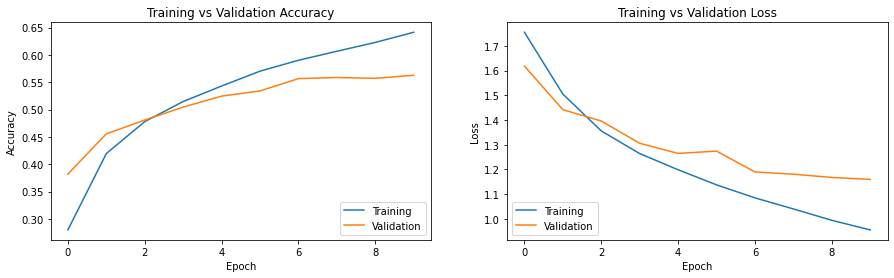

In [16]:
# creating a sequential model
mdl5_1 = Sequential()
mdl5_1.add(Conv2D(128, kernel_size = 3, activation='relu', input_shape = (48,48,1),padding='same'))
mdl5_1.add(Dropout(0.25))
mdl5_1.add(MaxPool2D(2))

mdl5_1.add(Conv2D(512, kernel_size = 4, activation='relu',padding='same'))
mdl5_1.add(Dropout(0.25))
mdl5_1.add(MaxPool2D(2))

mdl5_1.add(Conv2D(512, kernel_size = 4, activation='relu',padding='same'))
mdl5_1.add(Dropout(0.25))
mdl5_1.add(MaxPool2D(2))

mdl5_1.add(Conv2D(256, kernel_size = 3, activation='relu',padding='same'))
mdl5_1.add(Dropout(0.25))
mdl5_1.add(MaxPool2D(2))

mdl5_1.add(Flatten())
mdl5_1.add(Dense(256,activation = 'relu'))
mdl5_1.add(Dropout(0.25))

mdl5_1.add(Dense(7, activation='softmax'))

# compile the model
mdl5_1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

mdl5_1_performance = mdl5_1.fit(
    x=train_images,
    y=y_train, 
    validation_data = (validation_images, y_validation),
    epochs=10)

#compare how the model performs on the test dataset:
mdl5_1_test_loss, mdl5_1_test_acc = mdl5_1.evaluate(test_images, y_test, verbose=2)
print(f'\nTest accuracy: {mdl5_1_test_acc * 100.0:.2f}%')

# visualize accuracy
plot_model_accuracy(mdl5_1_performance)

In [32]:
train_images.shape

(28709, 48, 48, 1)

In [34]:
# creating a sequential model
mdl5_2 = Sequential()

input_shape = (28709,48,48,1)
mdl5_2.add(Conv2D(128, kernel_size = 3, activation='relu',input_shape=input_shape[1:] ,padding='same'))
mdl5_2.add(Dropout(0.25))
mdl5_2.add(MaxPool2D(2))

mdl5_2.add(Conv2D(512, kernel_size = 4, activation='relu',padding='same'))
mdl5_2.add(Dropout(0.25))
mdl5_2.add(MaxPool2D(2))

mdl5_2.add(Conv2D(512, kernel_size = 4, activation='relu',padding='same'))
mdl5_2.add(Dropout(0.25))
mdl5_2.add(MaxPool2D(2))

mdl5_2.add(Conv2D(256, kernel_size = 3, activation='relu',padding='same'))
mdl5_2.add(Dropout(0.25))
mdl5_2.add(MaxPool2D(2))

mdl5_2.add(Flatten())
mdl5_2.add(Dense(256,activation = 'relu'))
mdl5_2.add(Dropout(0.25))
mdl5_2.add(MaxPool2D(2))

mdl5_2.add(Dense(7, activation='softmax'))

# compile the model
mdl5_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

mdl5_2_performance = mdl5_2.fit(
    x=train_images,
    y=y_train, 
    validation_data = (validation_images, y_validation),
    epochs=10)

#compare how the model performs on the test dataset:
mdl5_2_test_loss, mdl5_2_test_acc = mdl5_2.evaluate(test_images, y_test, verbose=2)
print(f'\nTest accuracy: {mdl5_2_test_acc * 100.0:.2f}%')

# visualize accuracy
plot_model_accuracy(mdl5_2_performance)

ValueError: Input 0 of layer "max_pooling2d_12" is incompatible with the layer: expected ndim=4, found ndim=2. Full shape received: (None, 256)

In [30]:
mdl5_1.predict(test_images[0])

ValueError: in user code:

    File "/Users/ivan.miller/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/Users/ivan.miller/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/ivan.miller/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/ivan.miller/miniforge3/lib/python3.9/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/Users/ivan.miller/miniforge3/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "max_pooling2d_3" (type MaxPooling2D).
    
    Negative dimension size caused by subtracting 2 from 1 for '{{node sequential_1/max_pooling2d_3/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", explicit_paddings=[], ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](sequential_1/dropout_3/Identity)' with input shapes: [?,48,1,128].
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 48, 1, 128), dtype=float32)


In [29]:
test_images[0]
test_labels[0]

0